Inception Module의 [GoogLeNet 구조](https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf)

- [GoogLeNe](https://www.notion.so/modulabs/10-e4e941d4431c4bcd9172ba1b302062d8)


1. Inception Module - Naive version.

In [ ]:
# 임셉션 모듈을 만드는 것에 필요한 모듈 불러오기
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model # 모델 시각화에 사용

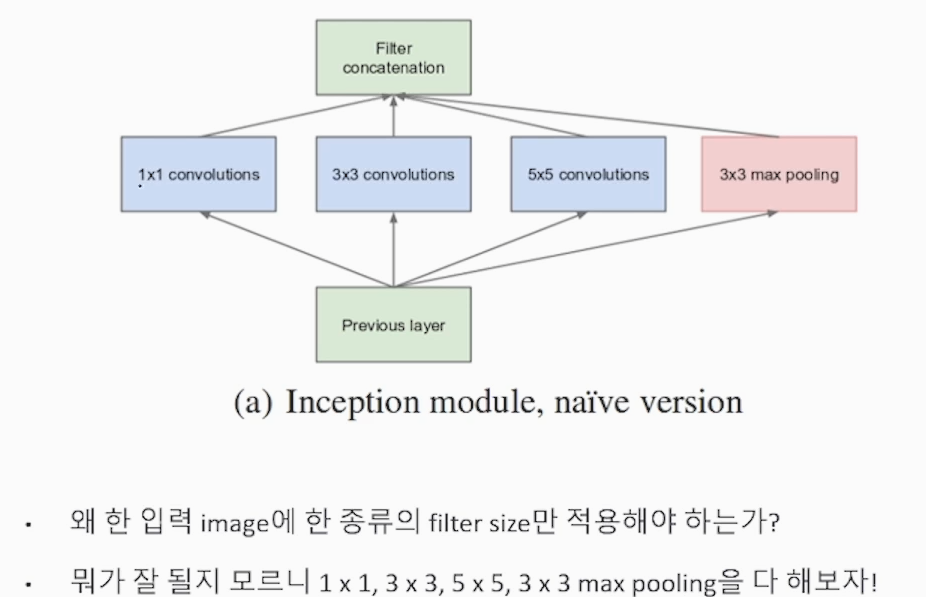

In [ ]:
# Naïve Inception 블록을 만들기 위한 함수
def naive_inception(input_layer, conv1_filter, conv3_filter, conv5_filter) :  # 1x1, 3x3, 5x5 크기의 필어를 사용하기위한 함수.
    # 1x1 사이즈의 kernel을 이용한 convolution2d layer
    conv1 = keras.layers.Conv2D(conv1_filter,  # 첫 번째 필터,
                                (1, 1),        # 1x1 사이즈
                                padding = 'same',  # 페딩을 상용후 출력물 사이즈는 원본가 같게.
                                activation = 'relu',)(input_layer) # 활성 함수는 relu : 0 1 출력

    # 3x3
    conv3 = keras.layers.Conv2D(conv3_filter,
                                (3, 3),
                                padding = 'same',
                                activation = 'relu')(input_layer)

    # 5x5
    conv5 = keras.layers.Conv2D(conv5_filter,
                                (5, 5),
                                padding = 'same',
                                activation = 'relu')(input_layer)

    # 3x3 max pooling layer (데이터의 크기 3x3으로 살펴보고 가장 큰 값만 출력)
    pool = keras.layers.MaxPooling2D((3, 3),
                                     strides = (1, 1),
                                     padding = 'same')(input_layer)

    # 1x1, 3x3, 5x5, Pooing 이 4개의 layer를 통해서 나온 feature map들을 모두 concatenation 한다.
    out_layer = keras.layers.Concatenate()([conv1, conv3, conv5, pool])
    return out_layer

마지막에 (input_layer)코드 [링크 텍스트](https://chatgpt.com/share/674a7c57-7df0-8007-88bb-8df4f8f72f13) 왜 사용하지??

In [ ]:
# input layer 를 정의해주고, Inception 블록도 하나 생성.
input_data = keras.layers.Input(shape = (256, 256, 3))
naive_inception_out = naive_inception(input_data, 64, 128, 32)

In [ ]:
# 출력
print(naive_inception_out)

<KerasTensor shape=(None, 256, 256, 227), dtype=float32, sparse=False, name=keras_tensor_5>


<KerasTensor shape=(None, 256, 256, 227), dtype=float32, sparse=False, name=keras_tensor_5>   
여기서 None은 패치의 크기를 나타낸다. [링크 텍스트](https://chatgpt.com/share/674a8057-5c90-8007-9850-a88447ea3b4b)

In [ ]:
# input layer와 naive inception 블록을 연결해서 모델 만들기

# 모델 만들기
model = keras.models.Model(inputs = input_data, outputs = naive_inception_out)

# 생성한 모델의 구조 확인
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │            256 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 128)  │          3,584 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 256, 256, 32)   │          2,432 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 256, 256, 3)    │              0 │ input_layer[0][0]      │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 256, 256, 227)  │              0 │ conv2d[0][0],          │
│                           │                        │                │ conv2d_1[0][0],        │
│                           │                        │                │ conv2d_2[0][0],        │
│                           │                        │                │ max_pooling2d[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 6,272 (24.50 KB)

 Trainable params: 6,272 (24.50 KB)

 Non-trainable params: 0 (0.00 B)

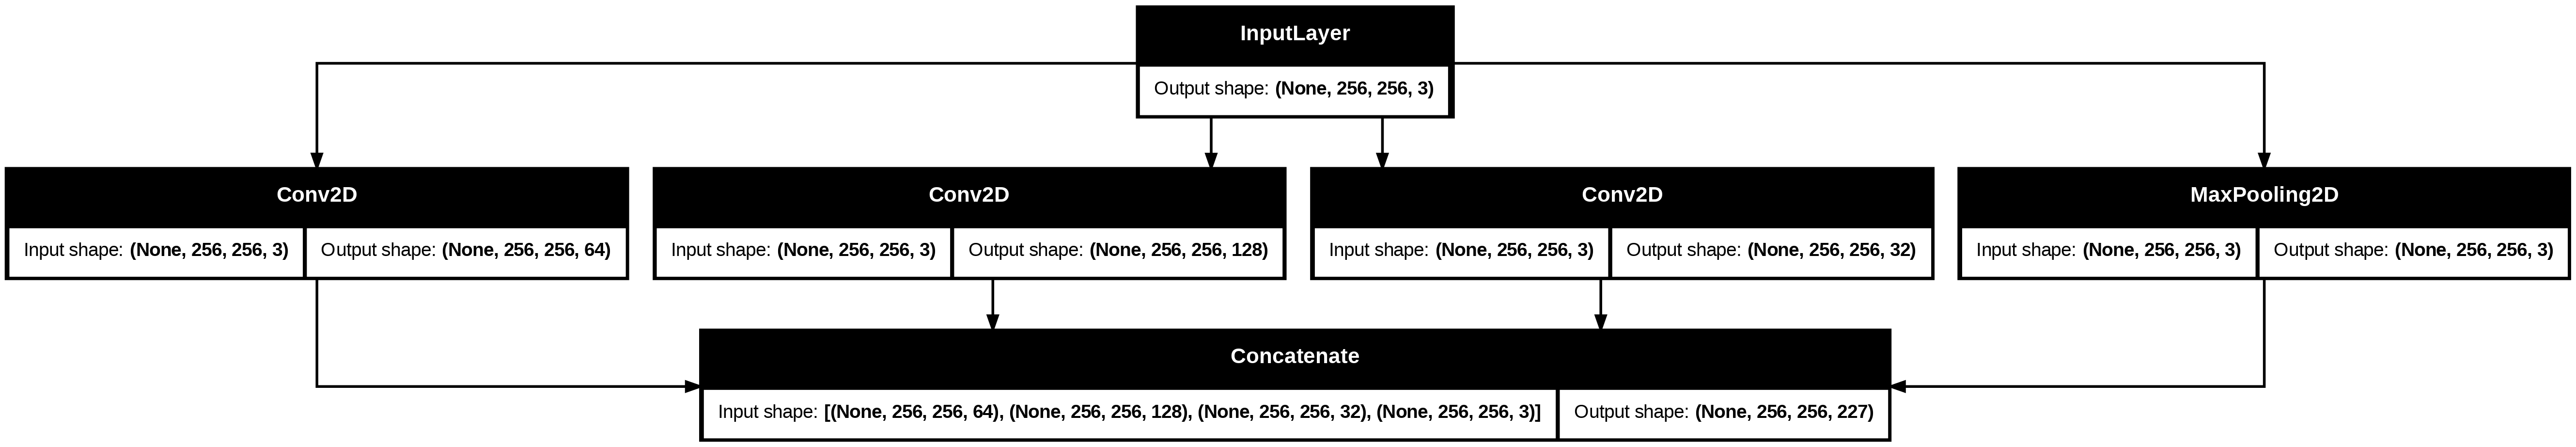

In [ ]:
# tensorflow.keras.utils 라이브러리의 plot_model 함수로 모델의 구조를 시각화.

# 모델 구조 시각화
plot_model(model, show_shapes = True, to_file = 'naive_inception_module.png')